In [1]:
import numpy as np
import matplotlib.pyplot as plt

# в этой либе есть методы чтения .jpg .png и преобразования их в массвы NumPy
import matplotlib.image as mpimg

In [12]:
image_as_array = mpimg.imread(r"C:\Users\chist\Desktop\thumb_m_dec_3078.jpg")

# вернет высоту/ширину/цвета
image_as_array.shape

(480, 480, 3)

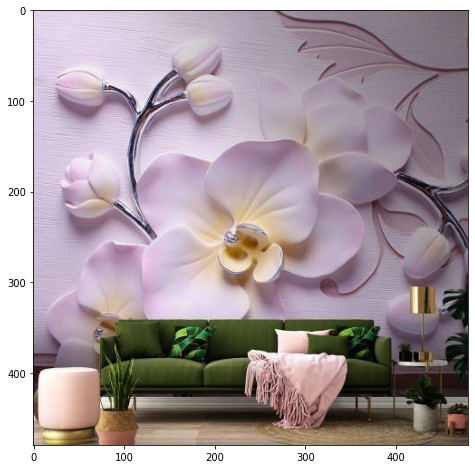

In [67]:
# выводим изображение на экран
plt.figure(figsize=(8,8))
plt.imshow(image_as_array)

In [68]:
# решейпим 3D (H,W,C) -> 2D (H*W, C)
# сначала распакуем кортеж
(h,w,c) = image_as_array.shape

#решейпим
image_as_array2D = image_as_array.reshape(h*w, c)

In [75]:
from sklearn.cluster import KMeans

#заквантуем в 6 цветов
model = KMeans(n_clusters=5)

labels = model.fit_predict(image_as_array2D)

In [76]:
# вернет ценроиды (тут - значения цветов для центроид)
# плюс округляем и переводим в int

rgb_codes = model.cluster_centers_.round(0).astype(int)

In [77]:
# меняем значения цветов в массиве на значения цветов центроид
# и решейпим обратно в нормальный массив для изображения

quantized_img = np.reshape(rgb_codes[labels], (h,w,c))

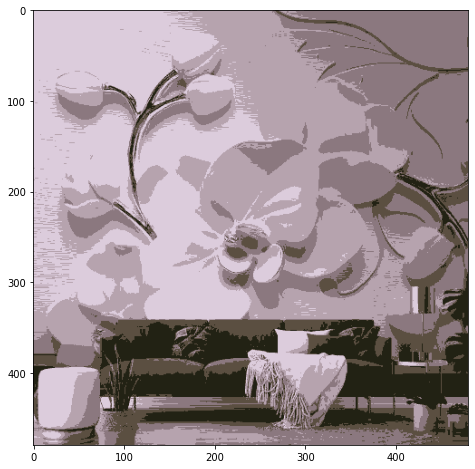

In [78]:
plt.figure(figsize=(8,8))
plt.imshow(quantized_img)

In [79]:
len(image_as_array2D)

230400

In [80]:
len(np.unique(quantized_img, axis=0))

480